In [77]:
# Install TensorFlow
#!pip install tensorflow

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.2.0


In [0]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create Data

In [0]:
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 20
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  # y = get_label(x, -1, -2, -3) # short distance - last 3 data points in series
  y = get_label(x, 0, 1, 2) # long distance - last 3 data points in series
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

# Build Linear Classification Model

In [0]:
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i) # binary classification

model = Model(i, x)

model.compile(optimizer=Adam(lr=0.01),
              loss='binary_crossentropy', # binary classification loss
              metrics=['accuracy'])

In [81]:
print(model.summary())

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 20)]              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
r = model.fit(X, Y,
              validation_split = 0.5,
              epochs = 200)

Epoch 1/200
79/79 [==============================] - 0s 3ms/step - loss: 0.7731 - accuracy: 0.5164 - val_loss: 0.7109 - val_accuracy: 0.4952
Epoch 2/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5196 - val_loss: 0.7002 - val_accuracy: 0.4932
Epoch 3/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5260 - val_loss: 0.7014 - val_accuracy: 0.5012
Epoch 4/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5172 - val_loss: 0.7013 - val_accuracy: 0.4912
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5192 - val_loss: 0.7018 - val_accuracy: 0.4896
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5128 - val_loss: 0.7014 - val_accuracy: 0.4936
Epoch 7/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5196 - val_loss: 0.7004 - val_accuracy: 0.4916
Epoch 8/200
7

# Evaluation Linear Classification Model

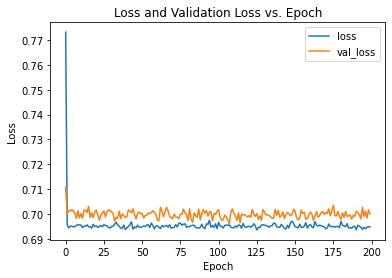

In [83]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Validation Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

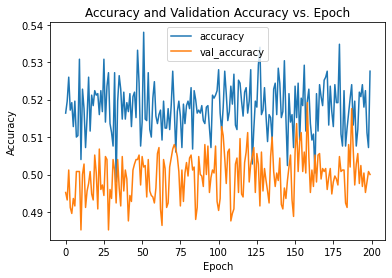

In [84]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy and Validation Accuracy vs. Epoch")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
# Accuracy hovers around 50% - binary classification

# Build Simple RNN Classification Model



In [0]:
i = Input(shape=(T, D))
x = SimpleRNN(10)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

model.compile(optimizer=Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [86]:
print(model.summary())

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 20, 1)]           0         
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
None


In [87]:
r = model.fit(X, Y,
              validation_split = 0.5,
              epochs=200)

Epoch 1/200
79/79 [==============================] - 1s 11ms/step - loss: 0.7009 - accuracy: 0.5032 - val_loss: 0.6979 - val_accuracy: 0.5016
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6983 - accuracy: 0.5116 - val_loss: 0.6957 - val_accuracy: 0.4956
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5272 - val_loss: 0.6826 - val_accuracy: 0.5760
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6885 - accuracy: 0.5520 - val_loss: 0.7002 - val_accuracy: 0.4796
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.5032 - val_loss: 0.7006 - val_accuracy: 0.4832
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6953 - accuracy: 0.5084 - val_loss: 0.6978 - val_accuracy: 0.5064
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.4936 - val_loss: 0.7020 - val_accuracy: 0.4908
Epoch 8/200


# Evaluate Simple RNN Classification Model

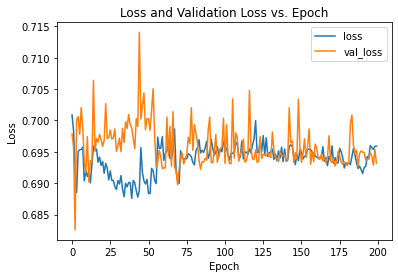

In [88]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Validation Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
# Loss is better

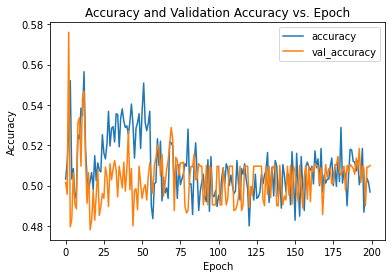

In [89]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy and Validation Accuracy vs. Epoch")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()


# Build LSTM Classification Model

In [0]:
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

model.compile(optimizer=Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [91]:
print(model.summary())

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 20, 1)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
None


In [92]:
r = model.fit(X, Y,
              validation_split = 0.5,
              epochs=200)

Epoch 1/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6936 - accuracy: 0.5008 - val_loss: 0.6935 - val_accuracy: 0.5104
Epoch 2/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6939 - accuracy: 0.4928 - val_loss: 0.6928 - val_accuracy: 0.5104
Epoch 3/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6933 - accuracy: 0.5136 - val_loss: 0.6926 - val_accuracy: 0.5072
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6925 - val_accuracy: 0.5088
Epoch 5/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6930 - accuracy: 0.5140 - val_loss: 0.6926 - val_accuracy: 0.5084
Epoch 6/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6937 - accuracy: 0.5060 - val_loss: 0.6924 - val_accuracy: 0.5136
Epoch 7/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6927 - accuracy: 0.5048 - val_loss: 0.6928 - val_accuracy: 0.5068
Epoch 

# Evaluate LSTM Classification Model

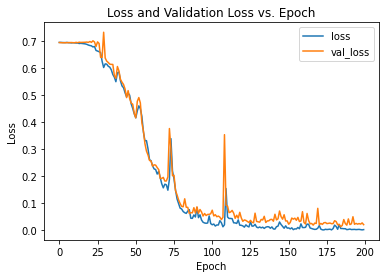

In [93]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Validation Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

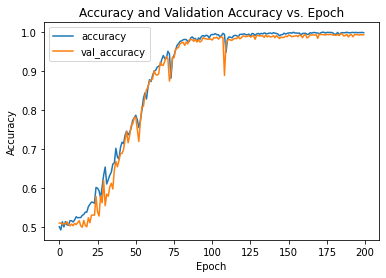

In [94]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy and Validation Accuracy vs. Epoch")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()


In [0]:
# LSTM performs better than Linear model, and Simple RNN over long distances (in time)
# But the distance in time can't be arbitrarily long, eventually it will fail.